In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from scipy import stats

In [2]:
#opening the data files
hfhiggs = h5py.File('higgs_100000_pt_1000_1200.h5', 'r')
hfqcd = h5py.File('qcd_100000_pt_1000_1200.h5', 'r')

In [3]:
#loading the data from the files into an array so that it can be easily used 
higgs_data = np.array(hfhiggs.get('higgs_100000_pt_1000_1200'))
qcd_data = np.array(hfqcd.get('qcd_100000_pt_1000_1200'))

In [4]:
#using pandas for this dataset 
higgs_table = pd.DataFrame(higgs_data)
higgs_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
higgs_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [5]:
#table for the background data
qcd_table = pd.DataFrame(qcd_data)
qcd_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
qcd_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


### Problem 1
1. Make a stacked histogram plot for the feature variable: mass
2. Evaluate expected significance without any event selection.
      
a. Use Poisson statistics for significance calculation
     
b. Compare the exact significance to the approximation  $NHiggs/(√NQCD)$. If they are equivalent, explain your findings.

I am plotting a histogram of the mass distribution for the Higgs and QCD data. I have normalized the QCD data to 2000 and the Higgs data to 50 by using the weights parameter in plt.hist(). The simulated datasets are the same size, but in real life, there would be a much higher proportion of QCD background data. Normalizing the two datasets to their respective values gives the correct proportions of magnitude, but doesn't require losing any information like removing Higgs events would. I am also plotting a true Poisson pmf that has the same mean as the background to see if I can use this as a pmf to describe the background distribution.

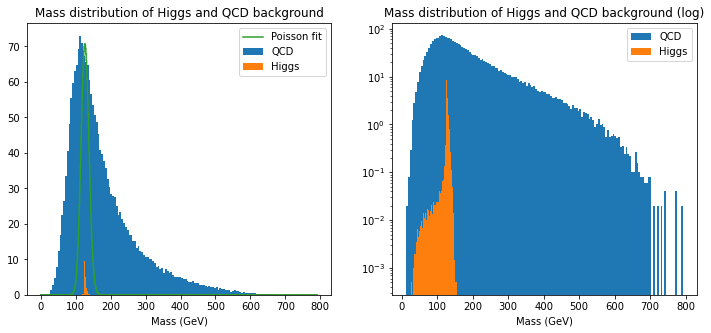

In [8]:
#plotting Higgs and QCD masses, and Poisson pmf
x = np.arange(0, qcd_table['mass'].max())
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(qcd_table['mass'], bins=150, label='QCD', weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))
ax[0].hist(higgs_table['mass'], bins=150, label='Higgs', weights=50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
ax[0].step(x, 2000 * stats.poisson.pmf(x, qcd_table['mass'].mean()-50), label='Poisson fit')
t= np.arange(0, 70)
ax[0].set_title('Mass distribution of Higgs and QCD background')
ax[0].set_xlabel('Mass (GeV)')
ax[0].set_label('Number of occurrences')
ax[0].legend()
ax[1].hist(qcd_table['mass'], bins=150, label='QCD', weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))
ax[1].hist(higgs_table['mass'], bins=150, label='Higgs', weights=50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
ax[1].set_title('Mass distribution of Higgs and QCD background (log)')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_label('Number of occurrences (log)')
ax[1].set_yscale('log')
ax[1].legend();

Distribution of the Higgs mass against the QCD background, both on normal and logarithmic scales. The Higgs data is normalized to 50, and the QCD to 2000 by using weight.

In [9]:
higgs_hist = np.histogram(higgs_table['mass'], bins = 150, weights = 50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
qcd_hist = np.histogram(qcd_table['mass'], bins=150, weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))

In order to find the significance of the Higgs mass against the QCD mass distribution, I must first find what the Higgs mass was measure to be. This corresponds to the mode of the Higgs mass data, or the middle to the spike in the distribution. I am using Poisson statistics to find the significance. I am calculating the probability of measuring the Higgs mass based on the Poisson pmf, and then finding the $\sigma$ associated with that probability on a standard normal distribution.

In [10]:
#finding the mode of the Higgs data
higgs_peak = higgs_hist[1][np.where(higgs_hist[0] == higgs_hist[0].max())]
higgs_peak

array([124.73021713])

In [11]:
prob = stats.poisson.sf(higgs_peak, qcd_table['mass'].mean())
sigma = stats.norm.isf(prob)

print('The sigma value of the Higgs measurement is: {}'.format(sigma))

The sigma value of the Higgs measurement is: [-4.17639903]


Calculating $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$, which can be used as an approximate significance threshold metric:

In [12]:
50/np.sqrt(2000)

1.118033988749895

Therefore, $\frac{N_{Higgs}}{\sqrt{N_{QCD}}} = 1.12$

I will be using this relation, 1.12, to estimate the significance for the rest of the lab.

### Problem 2
Identify mass cuts to optimize the expected significance.
1. Try different mass cuts systematically
2. Evaluate expected significance for each set of mass cuts
3. Identify the set of mass cuts which give you the highest significance.

For Reference, I am plotting the same plot above again.

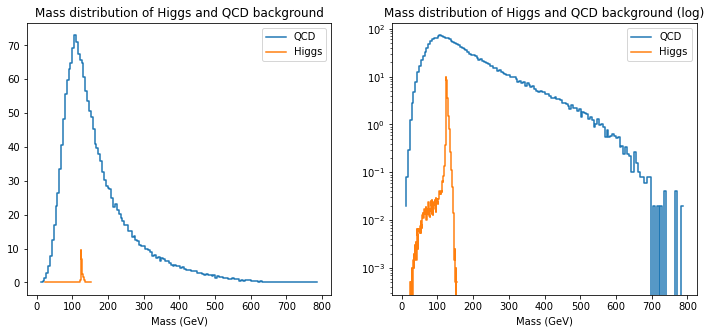

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].step(qcd_hist[1][:-1], qcd_hist[0], label='QCD')
ax[0].step(higgs_hist[1][:-1], higgs_hist[0], label='Higgs')
ax[0].set_title('Mass distribution of Higgs and QCD background')
ax[0].set_xlabel('Mass (GeV)')
ax[0].set_label('Number of occurrences')
ax[0].legend()
ax[1].step(qcd_hist[1][:-1], qcd_hist[0], label='QCD')
ax[1].step(higgs_hist[1][:-1], higgs_hist[0], label='Higgs')
ax[1].set_yscale('log')
ax[1].set_title('Mass distribution of Higgs and QCD background (log)')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_label('Number of occurrences (log)')
ax[1].legend();

I am going to make cuts at 100 and the maximum Higgs value, because that is where most of the Higgs data is. I want to keep as much of the Higgs data as possible. I am first going to leave most of the peak and see how the significance is affected. If the significance is still low, I will make more cuts around the true Higgs mass, which is 125 GeV.

In [14]:
higgs_table['mass'].max()

154.6136749993263

I am creating a function that uses a mask to select events from the pandas dataframes where the mass was in between a certain range of values. First I am choosing 100 GeV and 154.61 GeV, then I will make more cuts if needed. The selected data now has a different normalized value. The data has to be kept in the same proportions in order for the cutting to make sense. This means that if 50% of the background data was cut, that the new normalization value must be 50% of what it was originally, which is 2000. This will change the N values, and therefore change the significance of the Higgs data. I have also made a function that will return the new weight of the cut data.

In [15]:
#mass cut function, taking the dataset and the upper and lower bounds
def mass_cut(data, lower, upper):
    mask = (data['mass'] > lower) & (data['mass'] < upper)
    cut = data[mask]
    return cut

#weight function, taking the original data, the cut data, and the original normalized value
def new_weight(data, cut_data, original_weight):
    weight = original_weight * len(cut_data) / len(data)
    return weight

In [17]:
#doing the first cut: selecting masses between 100 and the Higgs max
higgs_1cut = mass_cut(higgs_table, 100, higgs_table['mass'].max())
qcd_1cut = mass_cut(qcd_table, 100, higgs_table['mass'].max())
print(higgs_1cut.size)
print(qcd_1cut.size)

1372784
471086


In [18]:
#finding the proportion of data kept
higgs_weight1 = new_weight(higgs_table, higgs_1cut, 50)
qcd_weight1 = new_weight(qcd_table, qcd_1cut, 2000)
print(higgs_weight1)
print(qcd_weight1)

49.028
672.98


Here the new $N_{Higgs}$ is about 49 and the new $N_{QCD}$ is about 673. The QCD data was reduced much more than the Higgs data, which is I expected. This makes $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$, and thus the significance greater.

Calculating $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$ for the new amounts of data:

I am rounding up for the number of QCD and rounding down for the number of Higgs, because this makes the significance estimate on the lower side. It is better to have a slightly lower significance than a slightly higher significance, because that will more likely ensure discovery when a 5$\sigma$ signal is reached.

In [19]:
cut1_sig = 49/np.sqrt(673)
print('The new significance of the Higgs data after the first cut: {}'.format(cut1_sig))

The new significance of the Higgs data after the first cut: 1.8888111940046644


In [25]:
higgs_2cut = mass_cut(higgs_table, 110, 140)
qcd_2cut = mass_cut(qcd_table, 110, 140)
higgs_weight2 = new_weight(higgs_table, higgs_2cut, 50)
qcd_weight2 = new_weight(qcd_table, qcd_2cut, 2000)
print(higgs_weight2)
print(qcd_weight2)

48.327
390.26


In [26]:
cut2_sig = 48/np.sqrt(391)
print('The new significance of the Higgs data after the second cut: {}'.format(cut2_sig))

The new significance of the Higgs data after the second cut: 2.427464339636033


In [20]:
higgs_3cut = mass_cut(higgs_table, 115, 135)
qcd_3cut = mass_cut(qcd_table, 115, 135)
higgs_weight3 = new_weight(higgs_table, higgs_3cut, 50)
qcd_weight3 = new_weight(qcd_table, qcd_3cut, 2000)
print(higgs_weight3)
print(qcd_weight3)

46.2655
261.58


In [21]:
cut3_sig = 46/np.sqrt(262)
print('The new significance of the Higgs data after the third cut: {}'.format(cut3_sig))

The new significance of the Higgs data after the third cut: 2.841889490789991


In [22]:
higgs_4cut = mass_cut(higgs_table, 120, 130)
qcd_4cut = mass_cut(qcd_table, 120, 130)
higgs_weight4 = new_weight(higgs_table, higgs_4cut, 50)
qcd_weight4 = new_weight(qcd_table, qcd_4cut, 2000)
print(higgs_weight4)
print(qcd_weight4)

37.9145
128.28


In [23]:
cut4_sig = 37/np.sqrt(129)
print('The new significance of the Higgs data after the fourth cut: {}'.format(cut4_sig))

The new significance of the Higgs data after the fourth cut: 3.2576683534048083


After cutting the data until it contains mass of only $\pm$5 GeV away from the true Higgs boson mass, 125 GeV, the significance has only gone up to 3.26$\sigma$. I am going to plot histograms of each of the cuts to see how much of the peak was lost. 

In [27]:
#making dictionaries of each of the weights and cuts to make plotting a bit more efficient
higgs_mass_cuts = {'Cut 1':higgs_1cut['mass'], 'Cut 2':higgs_2cut['mass'], 'Cut 3':higgs_3cut['mass'], 'Cut 4':higgs_4cut['mass']}
qcd_mass_cuts = {'Cut 1':qcd_1cut['mass'], 'Cut 2':qcd_2cut['mass'], 'Cut 3':qcd_3cut['mass'], 'Cut 4':qcd_4cut['mass']}
higgs_weights = {'Cut 1':higgs_weight1, 'Cut 2':higgs_weight2, 'Cut 3':higgs_weight3, 'Cut 4':higgs_weight4}
qcd_weights = {'Cut 1':qcd_weight1, 'Cut 2':qcd_weight2, 'Cut 3':qcd_weight3, 'Cut 4':qcd_weight4}

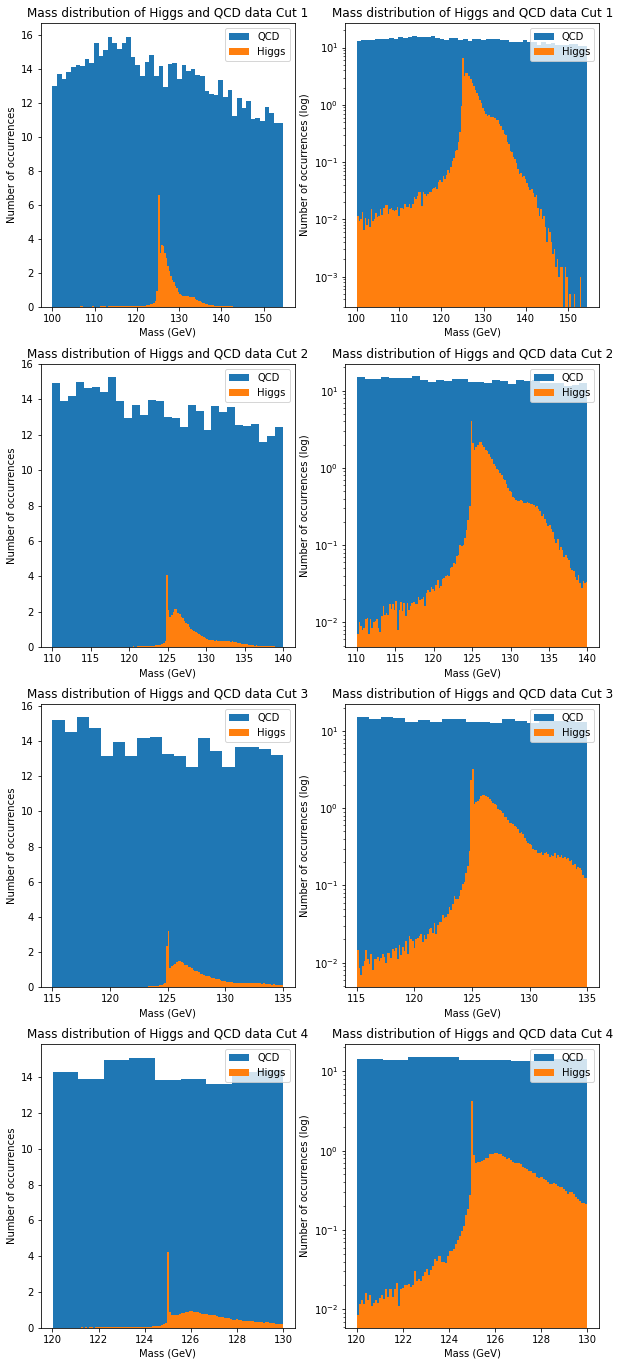

In [28]:
#looping through the dictionaries to plot the new distributions of mass normalized to their respective values
number = len(higgs_mass_cuts)
fig, axes = plt.subplots(number, 2, figsize = (10, 6*number))
for h, q, hw, qw, ax in zip(higgs_mass_cuts.items(), qcd_mass_cuts.items(), higgs_weights.items(), qcd_weights.items(), axes):
    ax[0].set_title('Mass distribution of Higgs and QCD data {}'.format(h[0]))
    ax[0].hist(q[1], label='QCD', bins=int(150*len(q[1])/100000), weights=qw[1]* np.ones(len(q[1])) / len(q[1]))
    ax[0].hist(h[1], label='Higgs', bins=int(150*len(h[1])/100000), weights=hw[1]* np.ones(len(h[1])) / len(h[1]))
    ax[0].set_xlabel('Mass (GeV)')
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('Mass distribution of Higgs and QCD data {}'.format(h[0]))
    ax[1].hist(q[1], label='QCD', bins=int(150*len(q[1])/100000), weights=qw[1]* np.ones(len(q[1])) / len(q[1]))
    ax[1].hist(h[1], label='Higgs', bins=int(150*len(h[1])/100000), weights=hw[1]* np.ones(len(h[1])) / len(h[1]))
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Mass (GeV)')
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distribution of the Higgs mass in comparison to the background after multiple cuts. Each noramlized to their appropriate value determined on the proportion of data from each set remaining.

The more mass cuts, the greater the significance will be. However after a certain number of cuts, there will be so little Higgs data, that it does not make sense to do any further analysis, because the stats are so low. There still needs to be enough Higgs data in order to justify a discovery. After looking at the histograms above, I think it will be more helpful to eliminate data based on other parameters, other than mass.

### Problem 3
Make two sets of stacked histogram plots for the rest of the features

Set A without any event selection

    1. Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)

Set B with your optimal mass cuts

    2. Can you identify another feature to further improve your expected signifiance?

Here are the plots of all the rest of the data before any cuts are made. I am looping through each column of the pandas dataframes and using plt.hist() normalized to the appropriate weights.

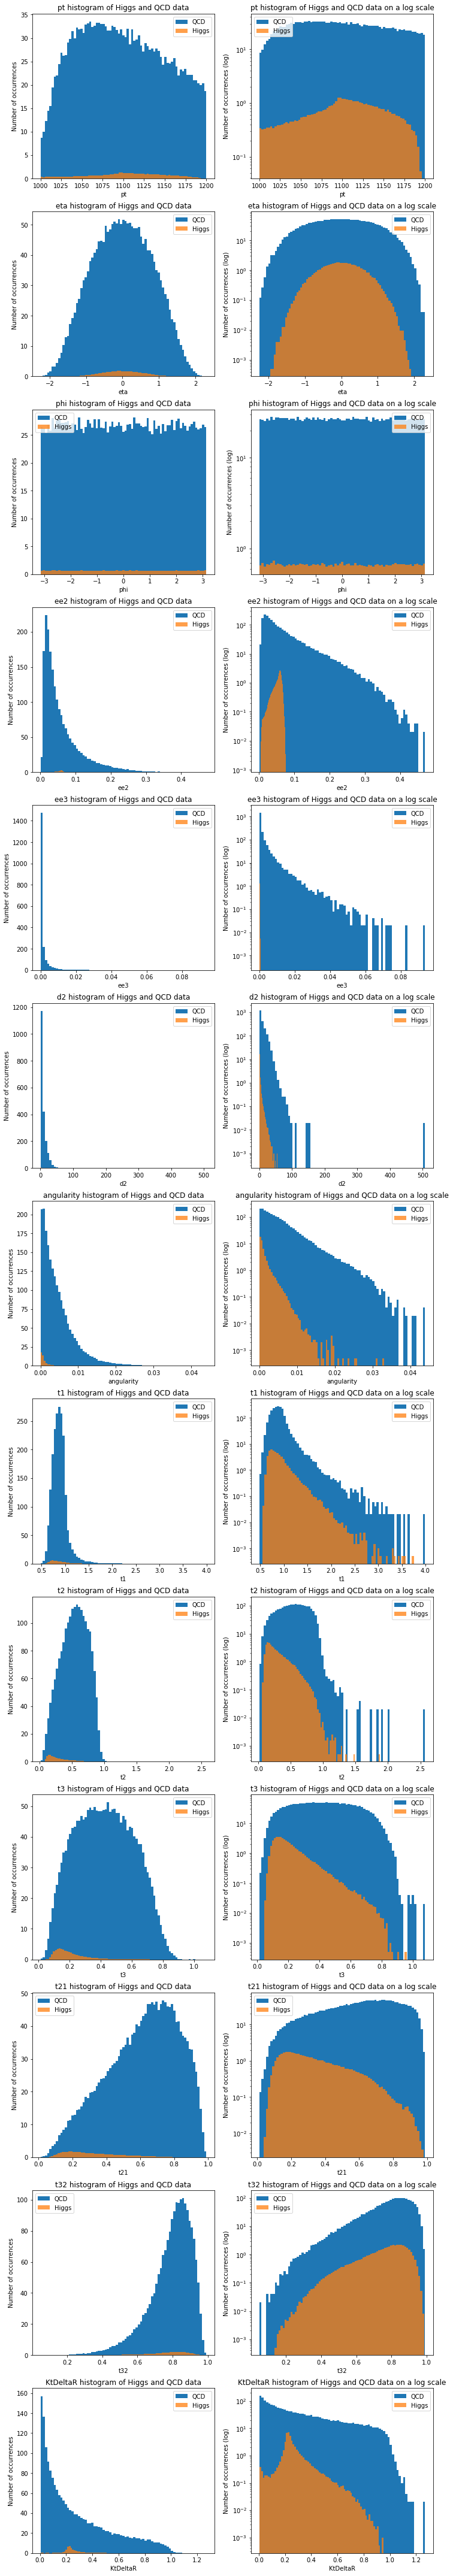

In [29]:
fig, axes = plt.subplots(13, 2, figsize=(12, 6*13))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns[:3].append(higgs_table.columns[4:])):
    ax[0].set_title('{} histogram of Higgs and QCD data'.format(column))
    ax[0].hist(qcd_table[column], bins=75, label='QCD', weights=2000*np.ones(len(qcd_table[column])) / len(qcd_table[column]))
    ax[0].hist(higgs_table[column], bins=75, label='Higgs', weights=50*np.ones(len(higgs_table[column])) / len(higgs_table[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data on a log scale'.format(column))
    ax[1].hist(qcd_table[column], bins=75, label='QCD', weights=2000*np.ones(len(qcd_table[column])) / len(qcd_table[column]))
    ax[1].hist(higgs_table[column], bins=75, label='Higgs', weights=50*np.ones(len(higgs_table[column])) / len(higgs_table[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of the rest of the parameters in the LHC simulation.

Based on these plots above, it looks like making cuts in $e_2$ and $e_3$ would give the best significance. A large amount of the QCD data could be eliminated without removing any Higgs data. This will minimize $N_{QCD}$ without affecting $N_{Higgs}$, which will maximize the ratio $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$. These distributions will most likely change after the mass cuts, and therfore no cuts should be made based on this data.

Plots of the all the parameters, besides mass, of the LHC data after the mass cut was made. This is to see how the distributions change. I loop through each parameter (not including mass) of the cut data and make a histogram. Each parameter might not be completely independent, and so each cut might systematically change the shape of each distribution, not just the overall number of events. Looking at the new distributions will help me in determing other features from which to cut.

In [31]:
higgs_table_cut = higgs_4cut
qcd_table_cut = qcd_4cut

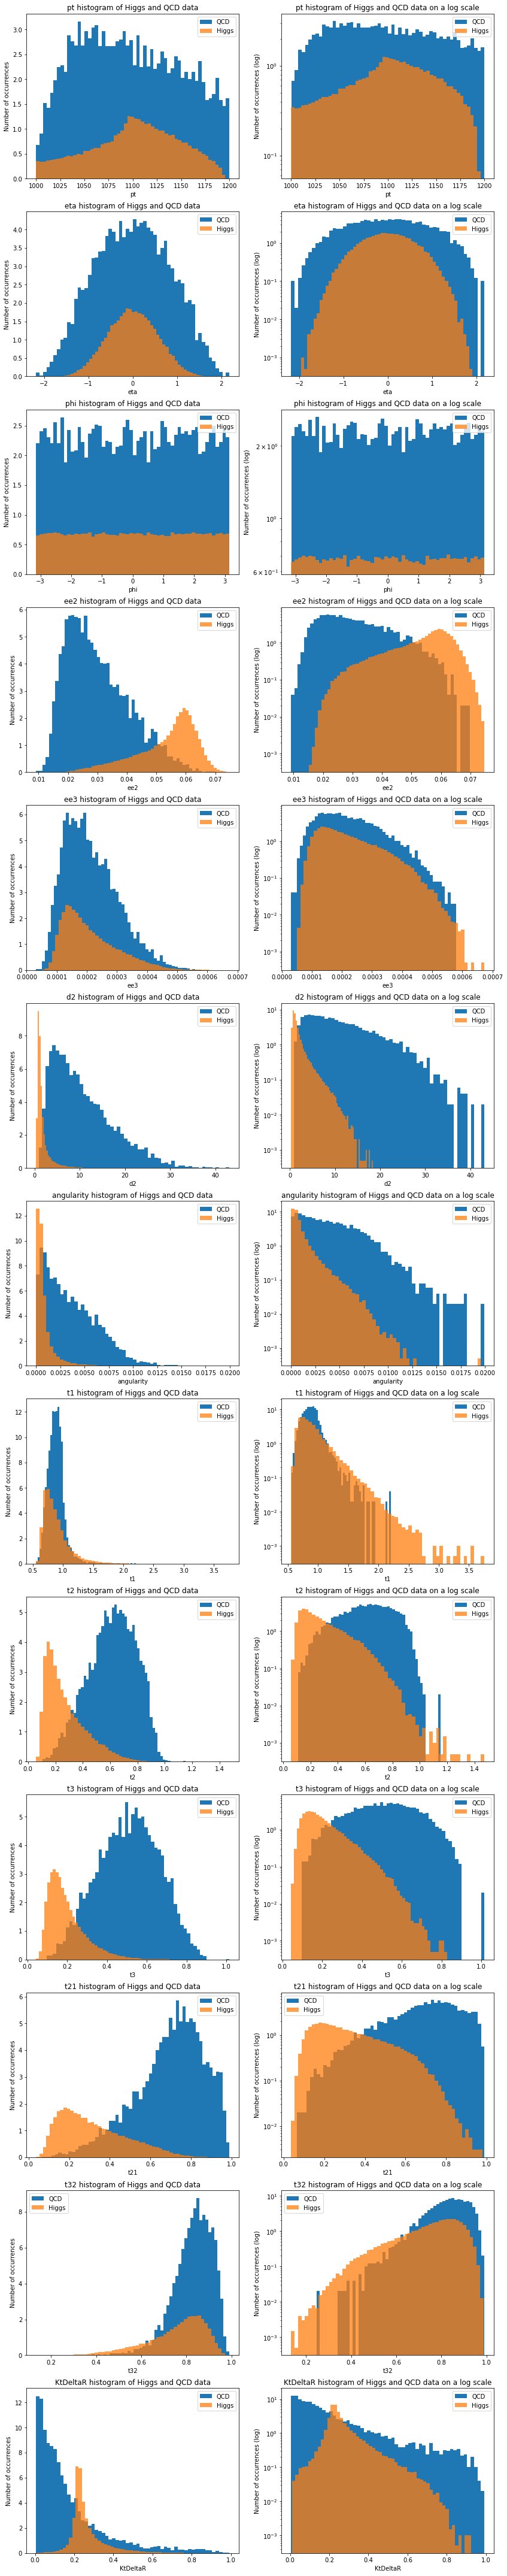

In [32]:
#creating histograms of the rest of the columns in the data with mass cuts
fig, axes = plt.subplots(13, 2, figsize=(14, 6*13))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns[:3].append(higgs_table.columns[4:])):
    ax[0].set_title('{} histogram of Higgs and QCD data'.format(column))
    ax[0].hist(qcd_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='QCD', weights=qcd_weight4*np.ones(len(qcd_table_cut[column])) / len(qcd_table_cut[column]))
    ax[0].hist(higgs_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='Higgs', weights=higgs_weight4*np.ones(len(higgs_table_cut[column])) / len(higgs_table_cut[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data on a log scale'.format(column))
    ax[1].hist(qcd_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='QCD', weights=qcd_weight4*np.ones(len(qcd_table_cut[column])) / len(qcd_table_cut[column]))
    ax[1].hist(higgs_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='Higgs', weights=higgs_weight4*np.ones(len(higgs_table_cut[column])) / len(higgs_table_cut[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of the Higgs and QCD data parameters after the mass cuts.

From looking at the new distibutions, it looks like I can make significant cuts on the $D_2$ and angularity data and eliminate little, if any of the Higgs data. This will maximize significance, because $N_{QCD}$ is decreasing, but $N_{Higgs}$ will remain about the same. Making cuts in $\eta$ or $K_t\Delta R$ may be useful as well. However, like with the mass cuts, once I make a cut using one parameter, I must reassess the data, because the distributions of other parameters are likely to change again.

### Problem 4

Optimize event selections using multiple features (if necessary)
1. Find a set of feature cuts which achieve high expected significance.
2. Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

I am first going to cut the $D_2$ data. I will start by removing the QCD data that is above all of the Higgs data, and see how that improves the significance. Then I will check the rest of the parameters to see if there are other cuts I can make without eliminating any more Higgs data. I will be using the data left from the mass cuts, because that has a different distribution than the original data. For this and any other feature cuts I make, I will be creating a function similar to the one I made to perform mass cuts, replacing the mass information with information of the given feature.

In [33]:
#creating a function to make D_2 cuts
def d2_cut(data, lower, upper):
    mask = (data['d2'] >= lower) & (data['d2'] <= upper)
    cut = data[mask]
    return cut

In [34]:
#cutting out all of the QCD data that has a D2 greater than the greatest D2 of the Higgs
higgs_Dcut = d2_cut(higgs_table_cut, higgs_table_cut['d2'].min(), higgs_table_cut['d2'].max())
qcd_Dcut = d2_cut(qcd_table_cut, higgs_table_cut['d2'].min(), higgs_table_cut['d2'].max())
#finding N for each (N_Higgs should remain the same in this case)
higgs_weightD = new_weight(higgs_table, higgs_Dcut, 50)
qcd_weightD = new_weight(qcd_table, qcd_Dcut, 2000)
print(higgs_weightD)
print(qcd_weightD)

37.9145
110.06


In [35]:
cutD_sig = 37/np.sqrt(111)
print('The new significance of the Higgs data after the D_2 cut: {}'.format(cutD_sig))

The new significance of the Higgs data after the D_2 cut: 3.5118845842842465


This cut does not give a 5$\sigma$ significance. More cuts are needed. Before this, I am plotting the other factors to see how the most recent cut affected the other parameters. If the angularity distribution wasn't affected, I can make cuts on that, again without eliminating any more Higgs data. Or there might be another parameter that has a difference in the Higgs and QCD distributions.

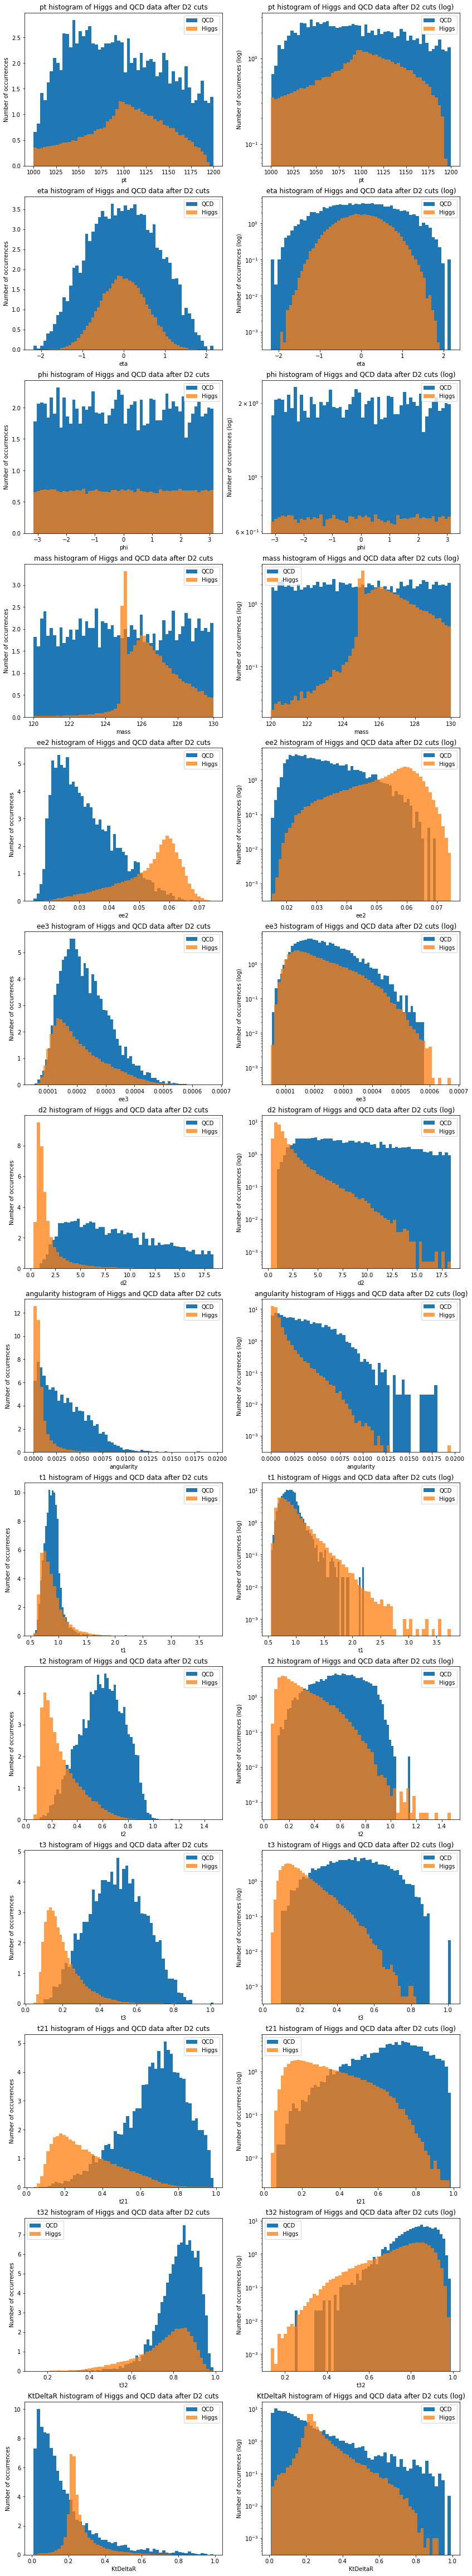

In [36]:
#plotting the data after the D_2 cuts
fig, axes = plt.subplots(14, 2, figsize=(14, 6*14))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns):
    ax[0].set_title('{} histogram of Higgs and QCD data after D2 cuts'.format(column))
    ax[0].hist(qcd_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='QCD', weights=qcd_weightD*np.ones(len(qcd_Dcut[column])) / len(qcd_Dcut[column]))
    ax[0].hist(higgs_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='Higgs', weights=higgs_weightD*np.ones(len(higgs_Dcut[column])) / len(higgs_Dcut[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data after D2 cuts (log)'.format(column))
    ax[1].hist(qcd_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='QCD', weights=qcd_weightD*np.ones(len(qcd_Dcut[column])) / len(qcd_Dcut[column]))
    ax[1].hist(higgs_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='Higgs', weights=higgs_weightD*np.ones(len(higgs_Dcut[column])) / len(higgs_Dcut[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

When looking at the new plots, making cuts on $t_3$ will probably eliminate the most QCD data. I will be cutting the data based on $t_3$ values to see how the significance increases. Then I will look at these plots again to see where else I can make cuts.

In [37]:
#creating a function to make t3 cuts
def t3_cut(data, lower, upper):
    mask = (data['t3'] >= lower) & (data['t3'] <= upper)
    cut = data[mask]
    return cut

In [38]:
#cutting out all of the QCD data that has a t_3 value less than the Higgs maximum t_3
higgs_T3cut = t3_cut(higgs_Dcut, higgs_Dcut['t3'].min(), higgs_Dcut['t3'].max())
qcd_T3cut = t3_cut(qcd_Dcut, higgs_Dcut['t3'].min(), higgs_Dcut['t3'].max())

In [39]:
#finding N for each, (N_Higgs should remain the same in this case)
higgs_weightT3 = new_weight(higgs_table, higgs_T3cut, 50)
qcd_weightT3 = new_weight(qcd_table, qcd_T3cut, 2000)
print(higgs_weightT3)
print(qcd_weightT3)

37.9145
109.08


In [40]:
cutT3_sig = 37/np.sqrt(110)
print('The new significance of the Higgs data after the t_3 cut: {}'.format(cutT3_sig))

The new significance of the Higgs data after the t_3 cut: 3.5278115802086916


This did not make much of a difference in the significance from the $D_2$ cuts, which gave a significance of about 3.51. I will try cutting a bit more from $t_3$ to try to increase the signficance.

In [41]:
#cutting the data that has t_3 values above 0.6 by using a mask
higgs_T3cut2 = t3_cut(higgs_T3cut, higgs_T3cut['t3'].min(), 0.6)
qcd_T3cut2 = t3_cut(qcd_T3cut, higgs_T3cut['t3'].min(), 0.6)
#finding the new N values
higgs_weightT32 = new_weight(higgs_table, higgs_T3cut2, 50)
qcd_weightT32 = new_weight(higgs_table, qcd_T3cut2, 2000)
print(higgs_weightT32)
print(qcd_weightT32)

37.8515
81.84


In [42]:
#calculating significance
cutT3_sig2 = 37/np.sqrt(82)
print('The new significance of the Higgs data after the second t_3 cut: {}'.format(cutT3_sig2))

The new significance of the Higgs data after the second t_3 cut: 4.085966464769322


Here I am getting closer to 5$\sigma$, which is 4.1 right now. I will plot the new distributions to look at how the other parameters changed, using the same method as above.

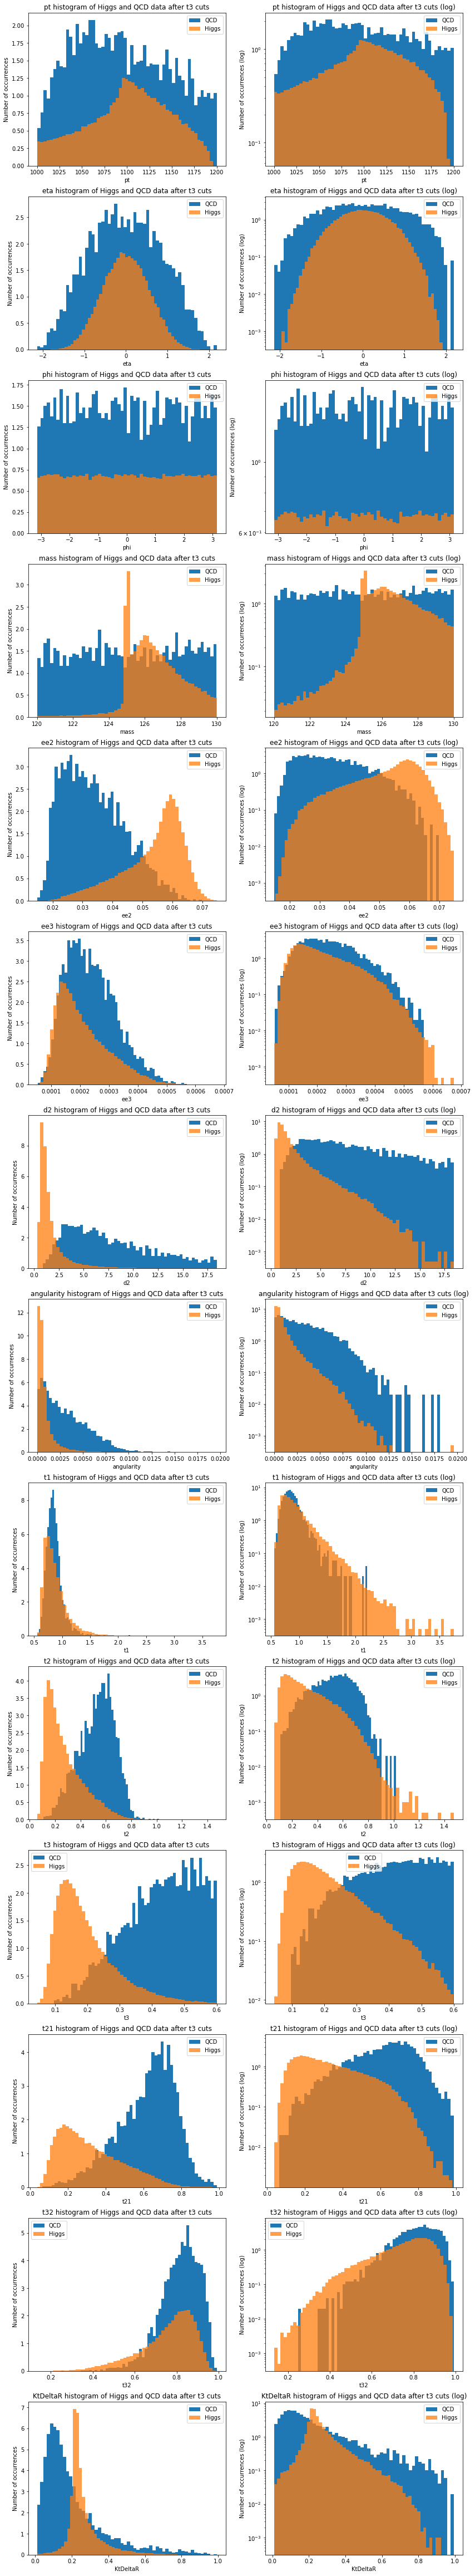

In [43]:
#plotting the data after the t_3 cuts
fig, axes = plt.subplots(14, 2, figsize=(14, 6*14))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns):
    ax[0].set_title('{} histogram of Higgs and QCD data after t3 cuts'.format(column))
    ax[0].hist(qcd_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='QCD', weights=qcd_weightT32*np.ones(len(qcd_T3cut2[column])) / len(qcd_T3cut2[column]))
    ax[0].hist(higgs_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='Higgs', weights=higgs_weightT32*np.ones(len(higgs_T3cut2[column])) / len(higgs_T3cut2[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data after t3 cuts (log)'.format(column))
    ax[1].hist(qcd_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='QCD', weights=qcd_weightT32*np.ones(len(qcd_T3cut2[column])) / len(qcd_T3cut2[column]))
    ax[1].hist(higgs_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='Higgs', weights=higgs_weightT32*np.ones(len(higgs_T3cut2[column])) / len(higgs_T3cut2[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

The rest of the QCD parameters only have small amounts outside of the Higgs distributions, and won't make much of a difference on improving the significance. Now, I will be focusing on what cuts I can make that will remove the most QCD data but the least Higgs data. Any cuts that I do that wouldn't eliminate any Higgs would not make much of a difference in the significance of the Higgs data. In this case, continuing to make cuts in $t_3$ look like they will make the biggest difference.

In [44]:
#making a mask that includes t_3 values of 0.45 or below
higgs_T3cut3 = t3_cut(higgs_T3cut2, higgs_T3cut2['t3'].min(), 0.45)
qcd_T3cut3 = t3_cut(qcd_T3cut2, higgs_T3cut2['t3'].min(), 0.45)
#finding the new N values
higgs_weightT33 = new_weight(higgs_table, higgs_T3cut3, 50)
qcd_weightT33 = new_weight(qcd_table, qcd_T3cut3, 2000)
print(higgs_weightT33)
print(qcd_weightT33)

37.0985
43.66


In [45]:
#calculating the new significance
cutT3_sig2 = 37/np.sqrt(44)
print('The new significance of the Higgs data after the second t_3 cut: {}'.format(cutT3_sig2))

The new significance of the Higgs data after the second t_3 cut: 5.577959874688627


After selcting datapoints that had $t_3$ values of 0.45 or below, I finally got a significance above 5$\sigma$, which is 5.6$\sigma$. The final amount of cuts that I did goes as follows: first I selected all events with a measured mass between 120 and 130 GeV, and then I removed any QCD events that had a $D_2$ measurement above the maximum Higgs $D_2$. I finally removed events containing a $t_3$ measurement greater than 4.5. By making these systematic cuts, which are meant to minimize the amount of background that needs to be dealt with, I am maximizing the signal-to-noise ratio (SNR) of the data. This means that the signal will count for more after the cuts than before, which is why it increases the significance of the data. The signal has a greater weight compared to the background, even though there are less signals than before, because I was able to eliminate even more background. To a certain extent, it is better to have a higher SNR that maximizing the number of signals, if that means that the number of background points increases as well.